In [1]:
# MSFR 경로 지정

import sys

sys.path.append('../..')

In [2]:
# MSFR 레이어 단일 모델

from torch import Tensor
from torch import device
import torch.nn as nn
from msfr import MSFR

dev = device('cpu')

class MSFRModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.msfr = MSFR(1, 1, device=dev)

    def forward(self, x: Tensor) -> Tensor:
        print(f"Shape of X: {x.shape}")
        result = self.msfr(x)
        print(f"Shape of result: {result.shape}")
        return result


In [3]:
# 샘플 데이터 생성

import random
from torch import Tensor
from torch import randint
from torch import sin

x_values = [random.uniform(0, 30) for _ in range(100)]
x_tensor = Tensor(x_values, device=dev).view(-1, 1)  # (50, 1) 형태로 변환
y_tensor = 10*sin(x_tensor) + (randint(-1, 2, x_tensor.shape).float() * 0.5)  # 약간의 노이즈 추가


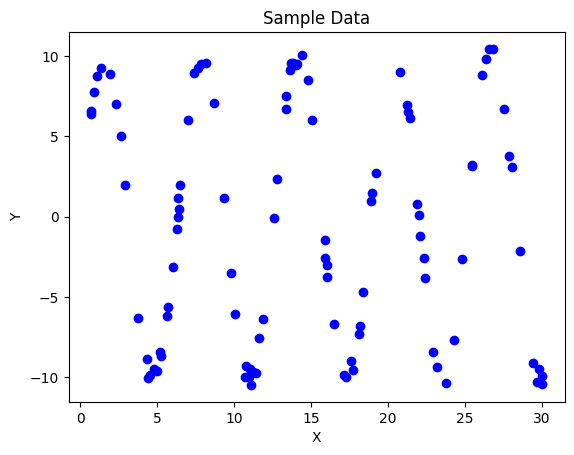

In [4]:
# 샘플 데이터 시각화

import matplotlib.pyplot as plt

plt.scatter(x_tensor.numpy(), y_tensor.numpy(), color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample Data')
plt.show()

In [5]:
# 모델 학습 및 출력 확인

from torch.optim import Adam
from torch.nn import MSELoss

model = MSFRModel()
optimizer = Adam(model.parameters(), lr=1e-2)
loss_fn = MSELoss()

epochs = 100
for epoch in range(1, epochs + 1):
    output = model(x_tensor)
    loss = loss_fn(output, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    def stats(t):
        return float(t.mean().item()), float(t.std().item())
    print(">>> CYCLES:", model.msfr.cycle.data.cpu().numpy())
    if model.msfr.cycle.grad is not None:
        print("cycle grad mean/std:", stats(model.msfr.cycle.grad))
    if model.msfr.weight.grad is not None:
        print("weight grad mean/std:", stats(model.msfr.weight.grad))
    if model.msfr.bias.grad is not None:
        print("bias grad mean/std:", stats(model.msfr.bias.grad))
    # optional: param norms
    print("weight norm:", model.msfr.weight.data.norm().item(), "bias norm:", model.msfr.bias.data.norm().item())
    optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
>>> CYCLES: [7.1960106]
cycle grad mean/std: (1.0020862817764282, nan)
weight grad mean/std: (-0.6791914105415344, 2.803358316421509)
bias grad mean/std: (0.874306321144104, nan)
weight norm: 0.27893438935279846 bias norm: 0.02713465690612793
Epoch 1, Loss: 55.2926139831543
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
>>> CYCLES: [7.1860104]
cycle grad mean/std: (0.9183874726295471, nan)
weight grad mean/std: (-0.7686893343925476, 2.8015968799591064)
bias grad mean/std: (0.8583616614341736, nan)
weight norm: 0.2701900899410248 bias norm: 0.017134657129645348
Epoch 2, Loss: 55.16043472290039
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
>>> CYCLES: [7.1760426]
cycle grad mean/std: (0.7557870149612427, nan)
weight grad mean/std: (-0.8575685024261475, 2.7975685596466064)
bias grad mean/std: (0.8424417972564697, nan)
weight norm: 0.2634716331958771 bias norm: 0.00713987

C:\Users\rrayy\AppData\Local\Temp\ipykernel_28312\2701530052.py:17: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\ReduceOps.cpp:1839.)
  return float(t.mean().item()), float(t.std().item())


In [6]:
# 모델 학습 결과 출력

from torch import no_grad

with no_grad():
    predicted = model(x_tensor)
    print("Predicted values:", predicted.squeeze().numpy())

Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Predicted values: [-2.0610719  -0.9277532  -0.9864681  -1.8736109  -2.3373795  -1.4197817
 -0.15271056  2.2227101   0.15376288 -1.8517839  -1.151666   -1.1261971
 -0.85225475 -1.2434013  -0.08812353 -0.8807932  -2.1430721  -1.1947368
 -0.02463782 -0.05802548  2.278802   -1.7433219  -1.4109548   2.1862946
 -1.2448077   1.289317   -0.85436624 -1.9427584  -1.4911392  -0.25453743
 -2.1208823   0.24617767 -1.3730767  -2.0285149   2.4098358  -1.5049125
  1.6813337  -0.8413652  -2.0830932  -2.339027    0.7183225   2.154385
  1.3851414  -1.7397178  -1.6777679  -2.3757477  -0.83842397  1.1896201
  1.1950034  -0.18067944  2.299099   -1.8575128   1.744125    1.2109954
 -1.8364319  -2.1214166  -0.9052483  -2.001986    1.28435    -0.78470516
 -0.2786137  -0.34042796  1.4390229  -1.0316242   0.16372591 -2.3838315
  1.243771    0.99655426 -1.3827233  -0.9888309   1.6065212  -0.83852804
 -0.99744904 -1.8604547   0.63640225 -1.13475

In [7]:
# 모델 파라미터 출력

bias = model.msfr.bias.detach().numpy()
cycle = model.msfr.cycle.detach().numpy()
weight = model.msfr.weight.detach().numpy()

print(f"Bias: {bias}")
print(f"Cycle: {cycle}")
print(f"Weight: {weight}")

Bias: [-0.4019946]
Cycle: [6.9874496]
Weight: [[ 0.51271224 -0.51419204  1.070451    0.82453984  1.0088083   0.75211763]]


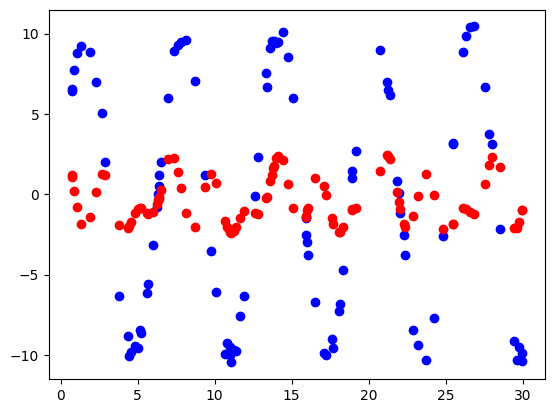

In [8]:
# 모델 학습 결과 시각화 및 비교

plt.scatter(x_tensor.numpy(), y_tensor.numpy(), color='blue', label='Data Points')
plt.scatter(x_tensor.numpy(), predicted.numpy(), color='red', label='MSFR Prediction')